In [106]:
import numpy as np
import librosa
from librosa import display
import matplotlib.pyplot as plt
import IPython.display as ipd

In [107]:
ipd.Audio("cantina60.wav")

In [108]:
audio, sample_rate = librosa.load("cantina60.wav")
print("Sample rate: {0} Hz".format(sample_rate))
print("Audio duration: {0} s".format(len(audio) / sample_rate))

Sample rate: 22050 Hz
Audio duration: 60.0 s


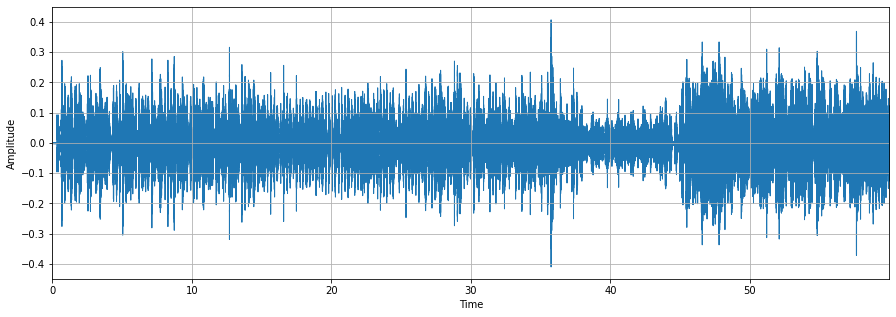

In [109]:
plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Amplitude')
display.waveplot(y=audio, sr=sample_rate)
plt.grid(True)

### Generate mfccs from signal time series using a pre-computed log-power spectogram


In [110]:
librosa.feature.mfcc(y=audio, sr=sample_rate)

array([[-6.25803196e+02, -6.24608705e+02, -6.24903089e+02, ...,
        -1.45715559e+02, -1.65980212e+02, -1.75427494e+02],
       [ 1.83931737e+01,  2.00667562e+01,  1.95909173e+01, ...,
         1.12659181e+02,  1.23058755e+02,  1.23482098e+02],
       [ 1.80940225e+01,  1.97225690e+01,  1.92918236e+01, ...,
        -1.93987954e+01, -2.38553583e+01, -2.23447014e+01],
       ...,
       [ 3.41863543e+00,  3.80404643e+00,  4.60684001e+00, ...,
        -3.18157294e+00, -1.46992962e+00, -2.02125549e+00],
       [ 2.77136201e+00,  3.05335820e+00,  3.65639233e+00, ...,
         3.37086917e-01,  6.70172919e-01, -2.50964054e+00],
       [ 2.22767970e+00,  2.41321911e+00,  2.95639257e+00, ...,
         1.15166921e+00,  1.94791758e+00,  5.54711691e+00]])

In [111]:
spectogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=128, fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(spectogram))

array([[-6.13353091e+02, -6.12481807e+02, -6.12348868e+02, ...,
        -1.26764889e+02, -1.45520549e+02, -1.52297891e+02],
       [ 1.88134892e+01,  2.00416200e+01,  2.02432577e+01, ...,
         9.60684706e+01,  1.04029131e+02,  1.03237588e+02],
       [ 1.84769513e+01,  1.96930917e+01,  1.99346600e+01, ...,
        -1.70865488e+01, -2.07035089e+01, -1.59329192e+01],
       ...,
       [ 3.06225343e+00,  3.40739222e+00,  3.90071015e+00, ...,
         1.34158935e+00,  2.80265441e+00,  4.57647081e+00],
       [ 2.45305890e+00,  2.70169046e+00,  3.04878183e+00, ...,
         3.97324304e-01,  2.16052264e-01,  1.77959213e+00],
       [ 1.94472109e+00,  2.10124988e+00,  2.29726656e+00, ...,
        -6.80948514e+00, -1.21700444e+01, -9.78242475e+00]])

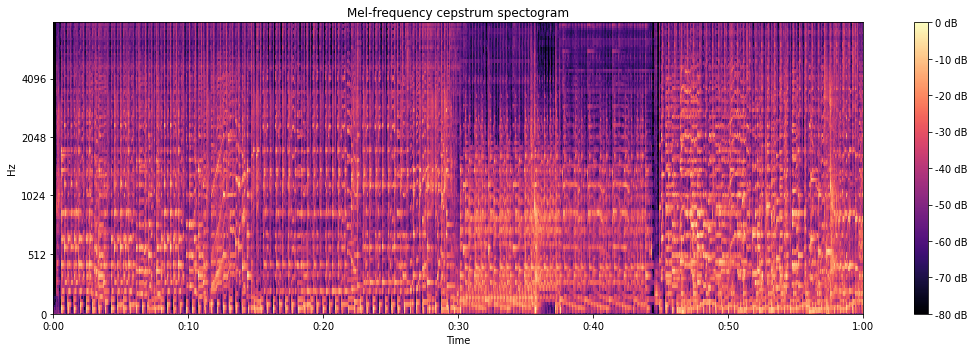

In [113]:
plt.figure(figsize=(15,5))
display.specshow(librosa.power_to_db(spectogram, ref=np.max), x_axis='time', y_axis='mel', fmax=8000)
plt.title('Mel-frequency cepstrum spectogram')
plt.colorbar(format='%d dB')
plt.tight_layout()